
# Project: Investigate TMDb Movies Dataset


> The main objective of the project is to explore a dataset and, through the data analysis process, to obtain some relevant information. This will be divided into 4 main steps:




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue, budget and so on.
In this project i will try to answer the following questions:
        <ul>
        <li> Which movie had the highest or lowest average rating?
        <li> Which month made the highest average revenue?
        <li> Can we find a relationship between film's popularity and the budget for its making?
        <li> How has the profit trend changed?
        <li> What relationship exists between popularity and average rating?
        <li> Has the average length of the films changed over time?


In [1]:
# Import all the packages necessary for the project

import numpy as np
import pandas as pd
import calendar as cal
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load data and print th first rows in order to understand the dataset

df = pd.read_csv('tmdb-movies.csv', sep=",")

df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Rename original_title and vote_average

df.rename({'original_title' : 'movie_title', 'vote_average' : 'average_rating'}, axis=1, inplace=True)

In [4]:
# Check for changes
df.head(1)

,id,imdb_id,popularity,budget,revenue,movie_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,average_rating,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
# Shape before cleaning 

print("Shape before cleaning : {}".format(df.shape).title())

Shape Before Cleaning : (10866, 21)


In [6]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
movie_title             10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
average_rating          10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
# Check for null values 

df.isnull().values.any()

True

In [11]:
# Identify the location of null values

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
movie_title                0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
average_rating             0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# Check for zeros values

(df==0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
movie_title                0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
average_rating             0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

As you can see, several columns have null values, which we must eliminate because they are not significant for the analysis. Also, some columns are not needed for the questions we aim to answer. Finally, there are several zero values that could skew the results.




### Data Cleaning
> In this section we focus on eliminating or modifying information that will not be used or that unnecessarily complicates the detaset analysis. 
Here are the main steps :
    <ul>
    <li> Remove unused columns
    <li> Remove duplicates, if any
    <li> Drop null values from the dataset
    <li> Replace 0 values with the mean
    <li> Change the format of <b>release_date</b> column, from string to datetime

In [13]:
# Remove unused columns

columns_to_drop = ['id', 'imdb_id', 'homepage', 'director', 'cast', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj']

df.drop(columns_to_drop, axis=1, inplace=True)

Unnecessary columns have been deleted

In [14]:
print("Shape after the first step of cleaning : {}".format(df.shape).title())

Shape After The First Step Of Cleaning : (10866, 9)


In [15]:
# Check for duplicates

df.duplicated().values.any()

True

In [16]:
# Remove duplicates

df.drop_duplicates(inplace=True)

In [17]:
# Check again that they are gone

df.duplicated().sum()

0

After checking for duplicates, i delete them.

In [18]:
print("Shape after the second step of cleaning : {}".format(df.shape).title())

Shape After The Second Step Of Cleaning : (10865, 9)


In [19]:
# Drop null values

df = df.dropna()

In [20]:
# Check for null values

df.isnull().sum()

popularity        0
budget            0
revenue           0
movie_title       0
runtime           0
genres            0
release_date      0
average_rating    0
release_year      0
dtype: int64

We have eliminated the null values and checked the success of the operation.

In [21]:
print("Shape after the third step of cleaning : {}".format(df.shape).title())

Shape After The Third Step Of Cleaning : (10842, 9)


In [22]:
# Create a new dataframe containing only columns that have zero values

zero_columns = ['budget', 'revenue', 'runtime']

df1 = df[zero_columns]

In [23]:
# Replace all zeros in the new dataframe with the average data value of that column

df1 = df1.apply(lambda x: x.replace(0, x.mean()), axis=0)

In [24]:
# Drop columns containing zeros from the original dataframe

df = df.drop(zero_columns, axis=1)

In [25]:
# Create a new updated dataframe using the concat function and display it

df_movies = pd.concat([df, df1], axis=1)

df_movies.head(2)

,popularity,movie_title,genres,release_date,average_rating,release_year,budget,revenue,runtime
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,150000000.0,1.513529e+09,124.0
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,150000000.0,3.784364e+08,120.0


In [26]:
# Check that zeros are not actually present in the new dataframe

(df_movies==0).values.any()

False

In [27]:
print("Shape after the fourth step of cleaning : {}".format(df_movies.shape).title())

Shape After The Fourth Step Of Cleaning : (10842, 9)


All zeros in each column have been replaced with the average data value of that column in order to make the results more consistent.

In [28]:
# Change the format of release_date column, from string to datetime

df_movies['release_date'] = pd.to_datetime(df['release_date'])

In [29]:
# Check that the format has been changed

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10842 non-null float64
movie_title       10842 non-null object
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
average_rating    10842 non-null float64
release_year      10842 non-null int64
budget            10842 non-null float64
revenue           10842 non-null float64
runtime           10842 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 847.0+ KB


We have changed the format of release_date column to datetime.

In [30]:
print("Shape after the cleaning section : {}".format(df_movies.shape).title())

Shape After The Cleaning Section : (10842, 9)


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the dataset has been cleaned up, we can begin to explore it, answering the various questions of our interest.



In [31]:
# Let's start by taking a look at some generic statistics of the dataset obtained after the data cleanup section

df_movies.describe()

,popularity,average_rating,release_year,budget,revenue,runtime
count,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000
mean,0.647461,5.974064,2001.314794,2.232495e+07,6.197271e+07,102.421062
std,1.001032,0.934257,12.813617,2.803615e+07,1.111273e+08,30.828622
min,0.000065,1.500000,1960.000000,1.000000e+00,2.000000e+00,2.000000
25%,0.208210,5.400000,1995.000000,1.465531e+07,3.991138e+07,90.000000
50%,0.384532,6.000000,2006.000000,1.465531e+07,3.991138e+07,99.000000
75%,0.715393,6.600000,2011.000000,1.500000e+07,3.991138e+07,111.000000
max,32.985763,9.200000,2015.000000,4.250000e+08,2.781506e+09,900.000000


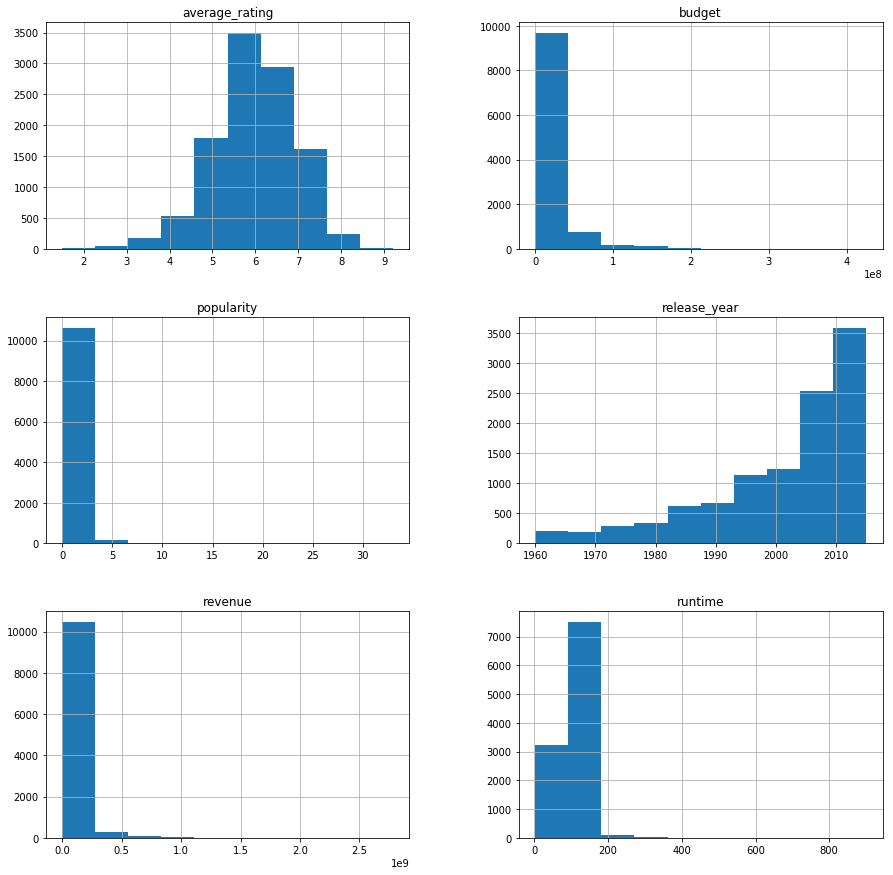

In [33]:
# Perform a quick exploration of all individual variables using a simple histogram chart

df_movies.hist(figsize=(15,15));

### Research Question 1 : Which movie had the highest or lowest average rating?

In [34]:
# Find the movie with the highest average rating

highest_avg_rating = df_movies['average_rating'].max()

highest_avg_movie = df['movie_title'].loc[df['average_rating'].idxmax()]

print("The movie with the highest average rating is: {}, with a score of {}".format(highest_avg_movie, highest_avg_rating).title())



The Movie With The Highest Average Rating Is: The Story Of Film: An Odyssey, With A Score Of 9.2


In [35]:
# Find the movie with the lowest average rating

lowest_avg_rating = df_movies['average_rating'].min()

lowest_avg_movie = df['movie_title'].loc[df['average_rating'].idxmin()]

print("The movie with the lowest average rating is: {}, with a score of {}".format(lowest_avg_movie, lowest_avg_rating).title())

The Movie With The Lowest Average Rating Is: Transmorphers, With A Score Of 1.5


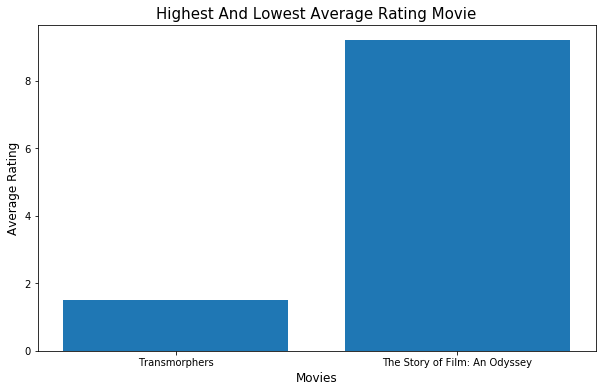

In [36]:
# Plot movies with highest and lowest average rating

plt.subplots(figsize=(10,6))
plt.bar([1,2], [lowest_avg_rating, highest_avg_rating], tick_label=[lowest_avg_movie, highest_avg_movie])
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Highest And Lowest Average Rating Movie', fontsize=15);



### Research Question 2 : Which month made the highest average revenue?

In [37]:
# Extract month from release_date column and create a new one

df_movies['month'] = df_movies['release_date'].dt.month

In [38]:
# Convert the month number to the month name

df_movies['month'] = df_movies['month'].apply(lambda x: cal.month_abbr[x])

In [39]:
# Calculate the average revenue for each month

avg_month_revenue = df_movies.groupby('month')['revenue'].mean()
avg_month_revenue

month
Apr    5.575057e+07
Aug    4.894628e+07
Dec    7.947808e+07
Feb    4.995856e+07
Jan    4.091056e+07
Jul    7.757586e+07
Jun    9.475027e+07
Mar    6.011580e+07
May    8.407927e+07
Nov    7.854570e+07
Oct    4.962752e+07
Sep    4.098315e+07
Name: revenue, dtype: float64

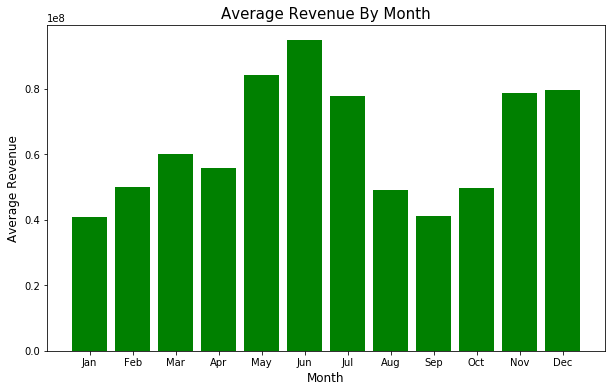

In [40]:
# Plot Average revenue by month

month = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']
plt.subplots(figsize=(10,6))
plt.bar([4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9], avg_month_revenue, tick_label=month, color = 'green')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue', fontsize=12)
plt.title('Average Revenue By Month', fontsize=15);

The months that guarantee the highest average income are May, June, November and December.




### Research Question 3 : Can we find a relationship between film's popularity and the budget for its making?

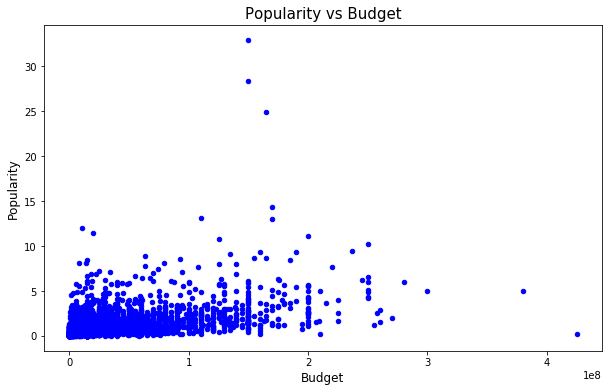

In [41]:
# Plot scatter plot for popularity and budget columns

df_movies.plot(x='budget', y='popularity', kind='scatter', color='blue', figsize=(10,6))
plt.title('Popularity vs Budget', fontsize = 15)
plt.xlabel('Budget', fontsize = 12)
plt.ylabel('Popularity', fontsize = 12);

In [42]:
# Calculate the correlation coefficient

df_movies[['budget', 'popularity']].corr()

,budget,popularity
budget,1.000000,0.515844
popularity,0.515844,1.000000


As the chart shows, there is a positive correlation between budget and popularity.



### Research Question 4 : How has the profit trend changed?

In [43]:
# Create a new column in order to get the profit of each movie

df_movies['profit'] = df_movies['revenue'] - df_movies['budget']

In [44]:
# Define a new function to calculate the mean of a variable by grouping by a second variable

def groupby_avg(c1, c2):
    avg_data = df_movies.groupby(c1)[c2].mean()
    return avg_data

In [45]:
# Calculate the change in average profit over time

avg_profit_year = groupby_avg('release_year', 'profit')
avg_profit_year

release_year
1960    2.448939e+07
1961    2.793312e+07
1962    2.546950e+07
1963    2.513555e+07
1964    2.867074e+07
1965    3.524260e+07
1966    2.533192e+07
1967    3.381154e+07
1968    2.355574e+07
1969    3.005685e+07
1970    2.824573e+07
1971    2.720564e+07
1972    3.296801e+07
1973    3.878503e+07
1974    3.318733e+07
1975    3.679504e+07
1976    3.141381e+07
1977    5.081438e+07
1978    3.446535e+07
1979    3.760872e+07
1980    2.915265e+07
1981    3.037700e+07
1982    3.682557e+07
1983    2.899660e+07
1984    3.080270e+07
1985    2.763251e+07
1986    2.644862e+07
1987    3.085389e+07
1988    2.914081e+07
1989    3.981005e+07
1990    3.924124e+07
1991    3.533535e+07
1992    4.267148e+07
1993    3.744380e+07
1994    3.960191e+07
1995    4.638778e+07
1996    3.618045e+07
1997    4.261849e+07
1998    3.656556e+07
1999    3.893721e+07
2000    3.811538e+07
2001    4.498716e+07
2002    4.643682e+07
2003    4.515987e+07
2004    4.401808e+07
2005    3.865416e+07
2006    3.466803e+07


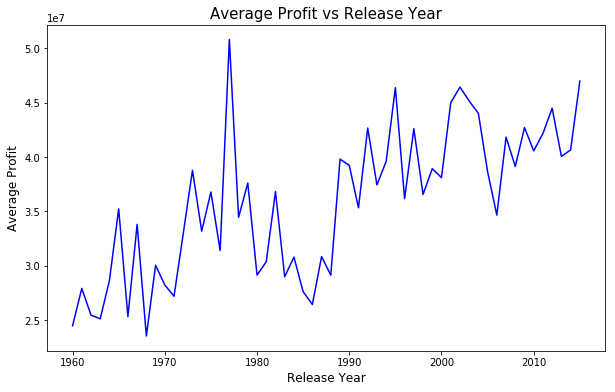

In [46]:
# Plot the relationship between release_year and profit

avg_profit_year.plot(kind='line', color='blue', figsize=(10,6))
plt.title('Average Profit vs Release Year', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Profit', fontsize=12);

We have plotted the trend over time of the average profit calculated year by year of the film industry.
As you can see, the trend shows a substantial progressive increase in profits.




### Research Question 5 : What relationship exists between average rating and profit?

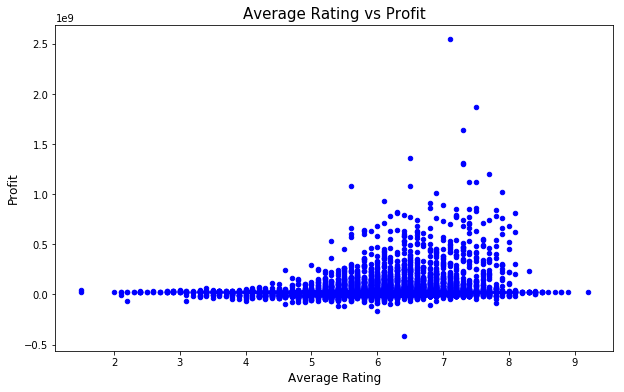

In [47]:
# Plot scatter plot for average_rating and profit columns

df_movies.plot(x='average_rating', y='profit', kind='scatter', color='blue', figsize=(10,6))
plt.title('Average Rating vs Profit', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Profit', fontsize=12);

In [48]:
# Calculate the correlation coefficient

df_movies[['average_rating', 'profit']].corr()

,average_rating,profit
average_rating,1.000000,0.158947
profit,0.158947,1.000000


We plotted the correlation between average rating and profit, finding a positive correlation between the two variables.



### Research Question 6 : Has the average length of the films changed over time?

In [49]:
# Find the average length of movies year by year

avg_length_year = groupby_avg('release_year', 'runtime')
avg_length_year

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
1970    113.075000
1971    107.727273
1972    101.950000
1973    103.527273
1974    107.804348
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    114.339450
1986     99.933884
1987    101.168000
1988    101.793103
1989    104.779412
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.123596
1994    106.913043
1995    107.574713
1996    106.167488
1997    106.505208
1998    105.061905
1999    108.861607
2000    104.314772
2001    108.024896
2002    107.632620
2003    101.043197
2004    105.364821
2005    103.515914
2006    101.934163
2007    100.410959
2008    100.495229
2009     98.303462
2010     98.618354
2011     98.489658

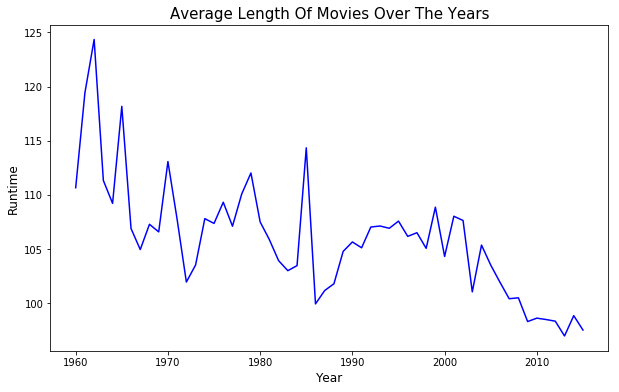

In [50]:
# Plot the trend over time

plt.subplots(figsize=(10,6))
plt.plot(np.arange(1960, 2016,1), avg_length_year, color='blue')
plt.title('Average Length Of Movies Over The Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Runtime', fontsize=12);

The chart found shows how the average length of the movies has progressively decreased over time.

<a id='conclusions'></a>
## Conclusions

>   <li> The movie with the highest average rating is 'The Story Of Film: An Odyssey', with an average score of 9.2 out of 10.     <li> The movie with the lowest average rating is 'Transmorphers', with a score of 1.5 out of 10.
    <li> The months that guarantee the highest average income are May, June, November and December.
    <li> An increase in the budget for the film is reflected in greater popularity.
    <li> The average profit of the film industry shows a considerable increase over the years.
    <li> The higher the rating of a movie, the greater the profit it can make.
    <li> The movies produced have become shorter on average over the years.
   


### Limitations

>   <li> Only the original budget and revenue values were used, ignoring the adjusted data for inflation.
    <li> Replacing zero values with the mean value of that specific column produces an approximation that skews the results.
    <li> The number of votes was not taken into account, so the average rating of each film could be skewed.
  

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0